# 3일차 - 250707
✅ 1. Clustering (K-Means)
- 3개의 군집으로 나눈 결과
- 서로 가까운 점들을 같은 색으로 묶었고, 빨간색 ‘X’는 중심(centroid)


✅ 2. Eigenvectors (고유벡터 시각화)
- 2x2 행렬의 고유벡터를 단위벡터처럼 원점에서 방향으로 표시
- 빨강 v_1, 초록 v_2 : 서로 직교하는 방향


✅ 3. EEG Spectral Decomposition (FFT 기반)
- 시뮬레이션된 EEG 신호를 주파수 성분으로 분해
- 주파수 10Hz, 20Hz에 뚜렷한 피크 → 두 개의 뇌파 성분 포함


✅ 4. PCA (주성분 분석)
- 5차원 데이터를 2차원으로 투영한 결과
- 데이터가 가장 많이 퍼진 방향(주성분)을 기준으로 표현됨

AttributeError: module 'seaborn' has no attribute 'scatterplot'

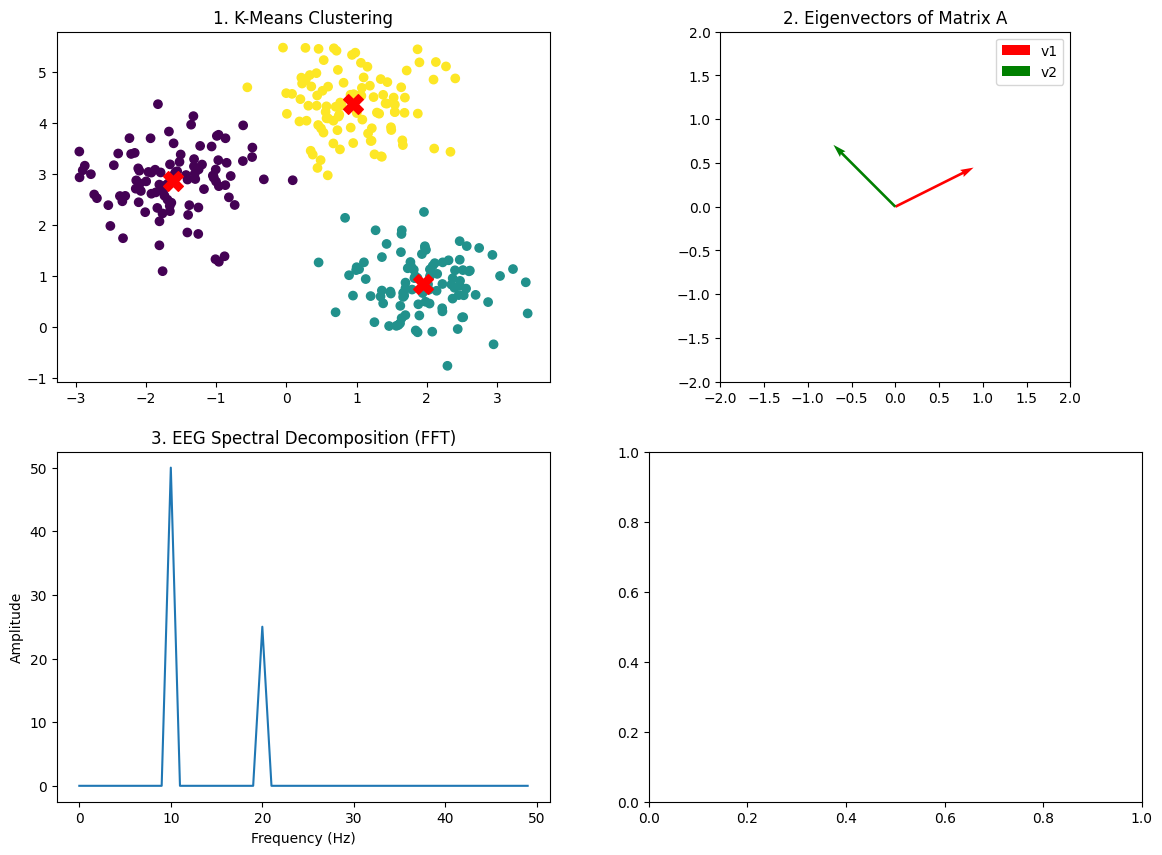

In [4]:
# 예제용 샘플 데이터를 다시 정리하여 오류 없이 출력되도록 재작성
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.fft import fft
import seaborn as sns

# 고정 시드
np.random.seed(42)

# 1. K-Means용 데이터
X_cluster, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X_cluster)

# 2. 고유벡터 예제
A = np.array([[4, 2], [1, 3]])
eigvals, eigvecs = np.linalg.eig(A)

# 3. EEG 시뮬레이션
fs = 100
t = np.linspace(0, 1, fs, endpoint=False)
eeg_signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)
fft_result = np.abs(fft(eeg_signal))[:fs // 2]
freqs = np.fft.fftfreq(fs, 1 / fs)[:fs // 2]

# 4. PCA 예제 데이터
X_pca_data, _ = make_blobs(n_samples=200, centers=3, n_features=5, random_state=1)
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_pca_data)

# 시각화
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Clustering
axs[0, 0].scatter(X_cluster[:, 0], X_cluster[:, 1], c=y_kmeans, cmap='viridis')
axs[0, 0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
axs[0, 0].set_title('1. K-Means Clustering')

# 2. Eigenvectors
axs[0, 1].quiver(0, 0, eigvecs[0, 0], eigvecs[1, 0], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
axs[0, 1].quiver(0, 0, eigvecs[0, 1], eigvecs[1, 1], angles='xy', scale_units='xy', scale=1, color='g', label='v2')
axs[0, 1].set_xlim(-2, 2)
axs[0, 1].set_ylim(-2, 2)
axs[0, 1].set_aspect('equal')
axs[0, 1].legend()
axs[0, 1].set_title('2. Eigenvectors of Matrix A')

# 3. EEG FFT
axs[1, 0].plot(freqs, fft_result)
axs[1, 0].set_title('3. EEG Spectral Decomposition (FFT)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

# 4. PCA
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], ax=axs[1, 1])
axs[1, 1].set_title('4. PCA Result (2D Projection)')

plt.tight_layout()
plt.show()


1️⃣ 이미지 압축 (SVD)
	•	원본 이미지를 SVD로 압축하여 특이값 상위 10개만 남겨서 복원.
	•	데이터 압축 및 효율적인 정보 표현을 보여주는 예시.

2️⃣ NMF 텍스트 주제 분석
	•	10개 문서의 단어 빈도 데이터로 3가지 주제를 발견하는 예제.
	•	각 주제별 단어 출현 비율을 시각적으로 확인 가능.

3️⃣ PCA 사용자 선호 분석
	•	가상 사용자 데이터 (공연, 레슨, 악보 관심도)를 2차원으로 축소.
	•	고객의 선호 패턴을 쉽게 시각화하여 그룹을 분류할 수 있게 도와줌.

4️⃣ 팬 네트워크 분석 (Eigenvector Centrality)
	•	팬들 사이의 관계에서 영향력 높은 팬을 색깔로 구별하여 표시.
	•	노드 색깔이 진할수록 영향력이 큼.

/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


AttributeError: module 'seaborn' has no attribute 'heatmap'

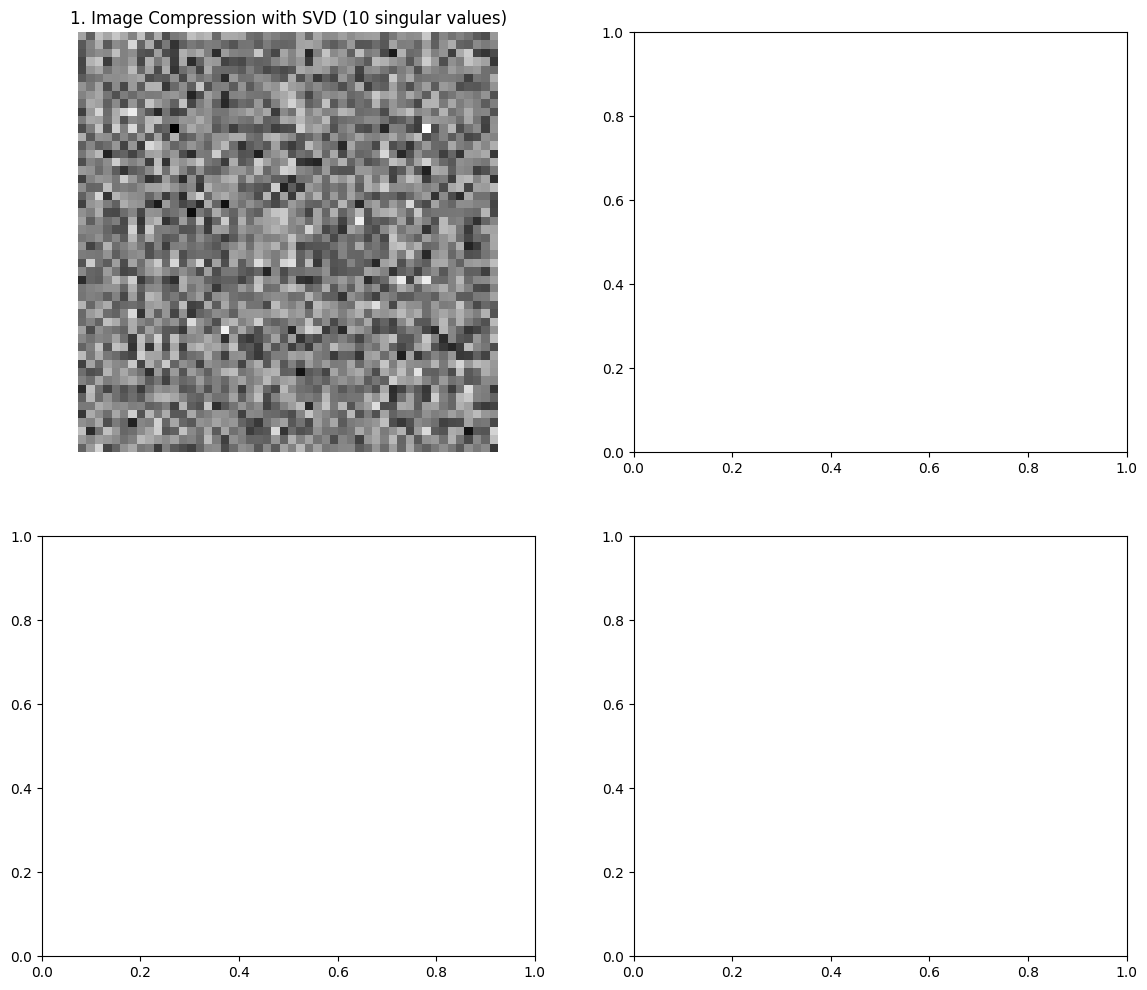

In [6]:
# 재실행: 사용자가 흥미를 가질만한 간단하고 재밌는 샘플을 제작해 볼게.
# (1) 이미지 압축 (SVD)
# (2) NMF로 텍스트 주제 분석
# (3) PCA로 사용자 선호 분석
# (4) Eigenvector Centrality로 팬 네트워크 분석

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, NMF
from scipy.linalg import svd
import networkx as nx
import seaborn as sns

# [1] 이미지 압축 예제 (SVD)
X_img = np.random.rand(50, 50)
U, S, Vt = svd(X_img, full_matrices=False)
S[10:] = 0  # 특이값 일부만 사용해 압축
compressed_img = np.dot(U, np.dot(np.diag(S), Vt))

# [2] NMF 텍스트 주제 분석 (단어 빈도 행렬 가정)
text_data = np.random.rand(10, 15)  # 10개 문서, 15개 단어
nmf = NMF(n_components=3, random_state=42)
W_nmf = nmf.fit_transform(text_data)
H_nmf = nmf.components_

# [3] PCA 사용자 선호 분석 (100명 사용자, 공연/레슨/악보 관심사)
user_data = np.random.rand(100, 3)  # 공연, 레슨, 악보 관심 정도
pca = PCA(n_components=2)
user_pref_2d = pca.fit_transform(user_data)

# [4] 팬 네트워크 Eigenvector Centrality 분석
G = nx.karate_club_graph()
centrality = nx.eigenvector_centrality(G)

# 시각화
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 이미지 압축 결과
axs[0, 0].imshow(compressed_img, cmap='gray')
axs[0, 0].set_title('1. Image Compression with SVD (10 singular values)')
axs[0, 0].axis('off')

# NMF 주제 분석 결과
sns.heatmap(H_nmf, cmap='viridis', ax=axs[0, 1])
axs[0, 1].set_title('2. Text Topic Analysis (NMF)')
axs[0, 1].set_xlabel('Word Index')
axs[0, 1].set_ylabel('Topic')

# PCA 사용자 선호 분석
sns.scatterplot(x=user_pref_2d[:, 0], y=user_pref_2d[:, 1], ax=axs[1, 0])
axs[1, 0].set_title('3. User Preference Analysis (PCA)')
axs[1, 0].set_xlabel('PC 1')
axs[1, 0].set_ylabel('PC 2')

# 팬 네트워크 Centrality
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_color=list(centrality.values()), cmap='coolwarm', with_labels=True, ax=axs[1, 1])
axs[1, 1].set_title('4. Fan Network Eigenvector Centrality')

plt.tight_layout()
plt.show()